## GNNShap Explanation Visualization

**__Please make sure to run this notebook from the project's root directory.__**


In [2]:
!export CC=gcc-9
!export CXX=g++-9

In [13]:
import time

import matplotlib

matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
import torch

from dataset.utils import get_model_data_config
from gnnshap.explainer import GNNShapExplainer

from dataset.configs import get_config

In [16]:
# count the number of mouse in list of devices
devices = ['laptop','mouse', 'charger', 'mouse', 'keyboard', 'mouse']
mouse_count = 0

for device in devices:
    if device.upper() == 'MOUSE':
        mouse_count += 1

print(f"mouse count : {mouse_count}")

mouse count : 3


In [18]:
import os

# dataset_name = 'Cora'
dataset_name = 'Elliptic'
num_samples = 25000
batch_size = 1024
sampler = 'GNNShapSampler'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# get mode, data and config
if dataset_name != 'Elliptic':
        model, data, config = get_model_data_config(dataset_name, load_pretrained=True, device=device)
else:
    config = {
            'hidden_dim': 16,
            'model': 'GCN',
            'num_layers': 2,
            'epoch': 250,  # Adjusted to match your training example
            'lr': 0.01,  # Matching your example
            'weight_decay': 5e-4,  # Matching your example
            'dropout': 0.5,  # Commonly used value
            'normalize': True,
            'add_self_loops': True,
            'test_nodes': None,
            'graphSVX_args': {'num_samples': 1000, 'S': 3, 'coal': 'SmarterSeparate',
                              'feat': 'Expectation'},
        }
    root_path = './' # root path. Can be changed to the path where the dataset is stored.
    results_path = f'./results'
    config['root_path'] = root_path
    config['results_path'] = results_path
    config['num_hops'] = config['num_layers']

    # config = get_config(dataset_name)
    root_path = config['root_path']

    # Load the dataset
    data = torch.load(os.path.join(config['root_path'], 'data.pt')) 
    model = torch.load(os.path.join(config['root_path'], 'model.pt'))
    model = model.to(device)

NameError: name 'os' is not defined

### Node 37 explanation

In [5]:
explain_node_idx = 37

gshap = GNNShapExplainer(model, data, nhops=config['num_hops'], verbose=0, device=device,
                    progress_hide=True)
start_time = time.time()

explanation = gshap.explain(explain_node_idx, nsamples=num_samples,
                                                        sampler_name=sampler,
                                                        batch_size=batch_size)

### Shapley values

In [6]:
explanation.shap_values

array([-0.25874567,  0.40779454, -0.06290591,  0.04673493, -0.01765382,
        0.03535423, -0.04081373, -0.01150306, -0.04571178,  0.00817486,
        0.00416122,  0.1204979 ], dtype=float32)

### Fidelity score for an explanation

In [7]:
explanation.fidelity_prob(model, data, sparsity=0.3, score_type='neg')

(0.04852336645126343, 0.25)

### Explanation times

In [8]:

explanation.time_comp_graph, explanation.time_sampling, explanation.time_predictions, explanation.time_solver

(0.001886606216430664,
 0.001920461654663086,
 0.03821110725402832,
 0.3103456497192383)

### Explanation Graph

Blue edges reduce the prediction score while red edges increase the score.

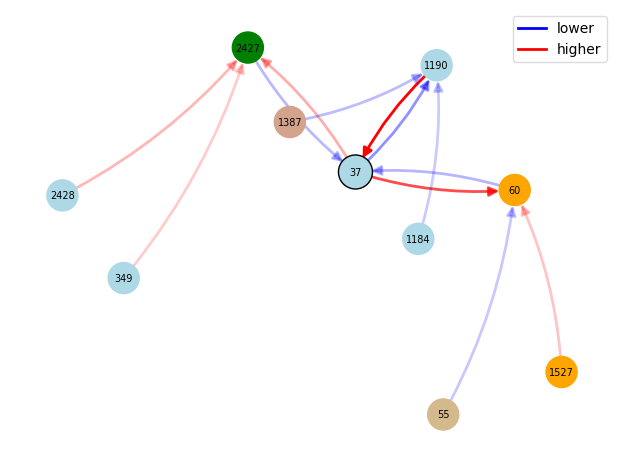

In [9]:
explanation.plot_graph(show_scores=False, show=False)
plt.tight_layout()
plt.box(False)
#plt.savefig('ExplanationGraph.pdf', dpi=300, bbox_inches='tight')

### Bar plot

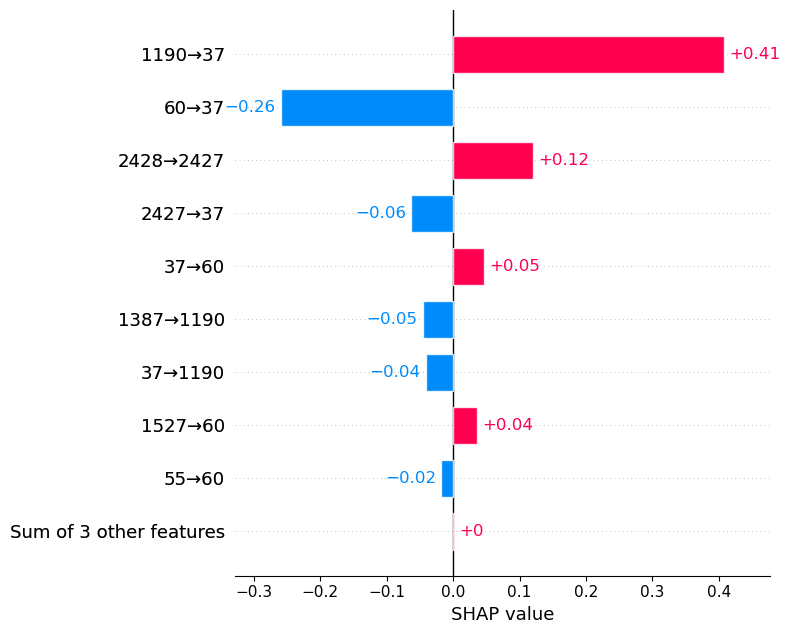

In [8]:
explanation.plot_bar(show=False)
plt.tight_layout()
#plt.savefig("BarVisualization.pdf", dpi=300, bbox_inches='tight')

### Force plot

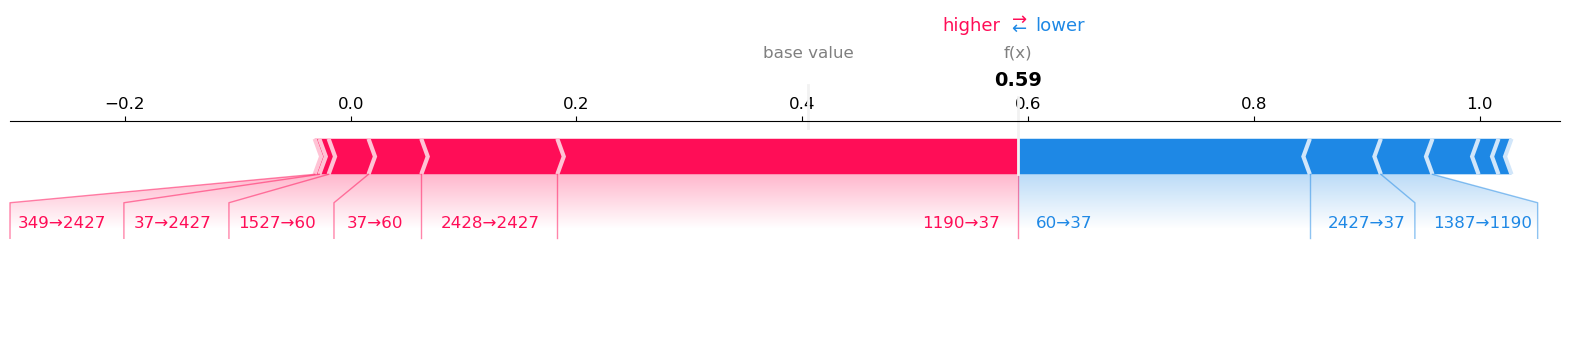

In [9]:
explanation.plot_force(show_values=False)